In [1]:
# import the libraries we need for EDA:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use("ggplot") # make the plots to look nicer

In [2]:
# import the training and test files:
train_df = pd.read_csv(r"C:\Users\Admin\Downloads\rossman_dataset\rossman_train.csv")
store_df = pd.read_csv(r"C:\Users\Admin\Downloads\rossman_dataset\rossman_store.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9388\2458661038.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r"C:\Users\Admin\Downloads\rossman_dataset\rossman_train.csv")


In [3]:
#how many datas are in the files:
print("in the training set we have", train_df.shape[0], "observations and", train_df.shape[1], "columns/variables.")
print("in the store set we have", store_df.shape[0], "observations and", store_df.shape[1], "columns/variables.")

in the training set we have 1017209 observations and 9 columns/variables.
in the store set we have 1115 observations and 10 columns/variables.


In [4]:
#how does the data looks like:
pd.concat([train_df.head(), train_df.tail()]) #show the first and last 5 rows.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,7/31/2015,5263,555,1,1,0,1
1,2,5,7/31/2015,6064,625,1,1,0,1
2,3,5,7/31/2015,8314,821,1,1,0,1
3,4,5,7/31/2015,13995,1498,1,1,0,1
4,5,5,7/31/2015,4822,559,1,1,0,1
1017204,1111,2,1/1/2013,0,0,0,0,a,1
1017205,1112,2,1/1/2013,0,0,0,0,a,1
1017206,1113,2,1/1/2013,0,0,0,0,a,1
1017207,1114,2,1/1/2013,0,0,0,0,a,1
1017208,1115,2,1/1/2013,0,0,0,0,a,1


In [5]:
# no missing values.
train_df.isnull().all()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

# Lets start with the first variable -> Sales

In [6]:
opened_sales = (train_df[(train_df.Open == 1) & (train_df.Sales)]) #if the stores are opend
opened_sales.Sales.describe()

count    422307.000000
mean       6951.782199
std        3101.768685
min         133.000000
25%        4853.000000
50%        6367.000000
75%        8355.000000
max       41551.000000
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'Sales Boxplot'}>

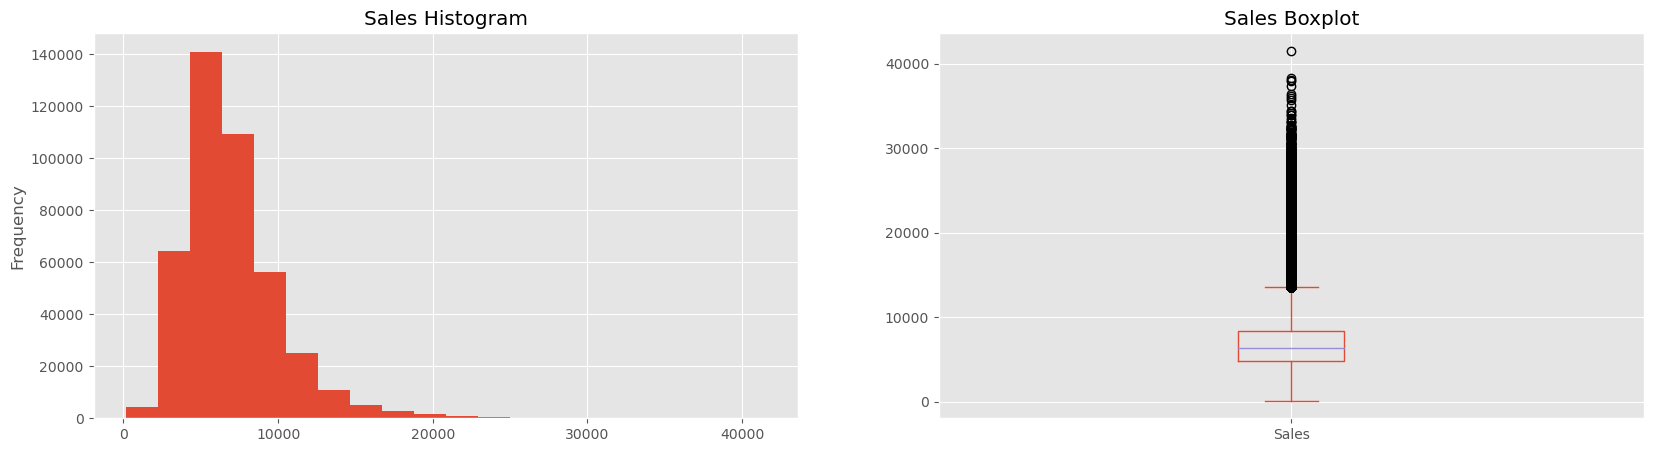

In [7]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

opened_sales.Sales.plot(kind = "hist", title = "Sales Histogram", bins = 20, ax = ax[0])
opened_sales.Sales.plot.box(title = "Sales Boxplot", ax = ax[1])

In [8]:
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales > 10000)].count() / opened_sales.shape[0] * 100, 2), 
      "% of the time big sales, over 10.000 Euros")
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales < 1000)].count() / opened_sales.shape[0] * 100, 4), 
      "% of the time low sales, under 1000 Euros")

Rossmann has 13.45 % of the time big sales, over 10.000 Euros
Rossmann has 0.0277 % of the time low sales, under 1000 Euros


In [9]:
train_df.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

<AxesSubplot:title={'center':'Sales Boxplot'}>

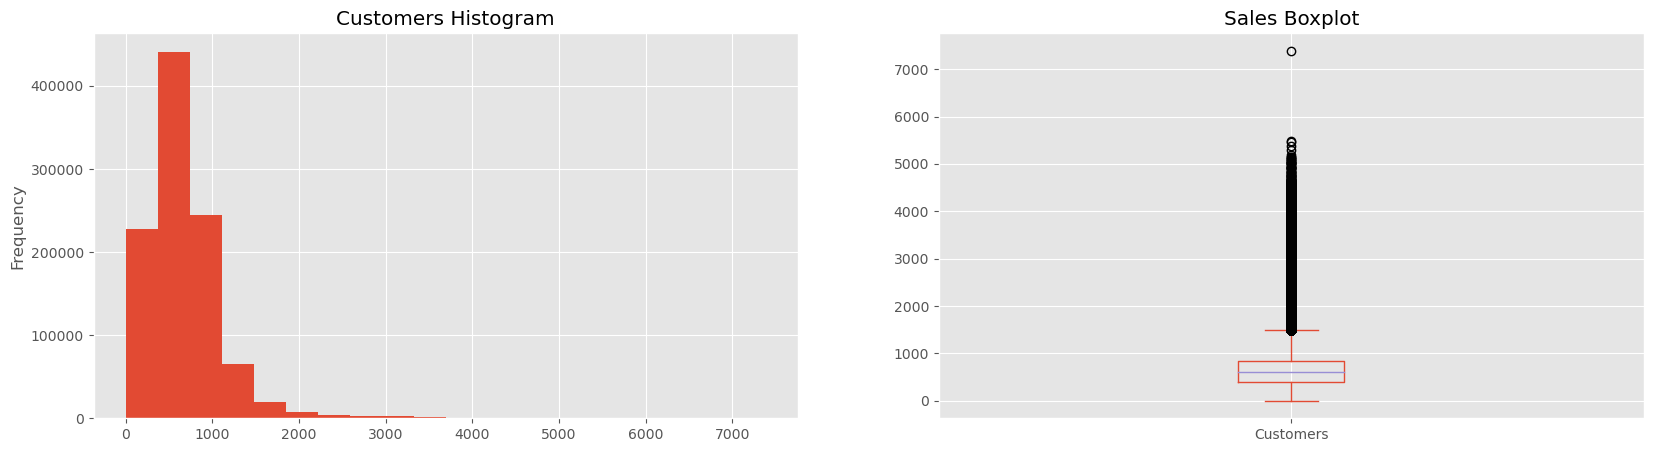

In [10]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

train_df.Customers.plot(kind = "hist", title = "Customers Histogram", bins = 20, ax = ax[0])
train_df.Customers.plot.box(title = "Sales Boxplot", ax = ax[1])


In [11]:
#Seems to had a great sortiment on 22th of January 2013. They hit the record of customers. 
train_df[(train_df.Customers > 6000)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,1/22/2013,27190,7388,1,1,0,0


In [12]:
print("In 3 years, different stores where", train_df[(train_df.Open == 0)].count()[0], "times closed")
print("From this days,", train_df[(train_df.Open == 0) & 
         ((train_df.StateHoliday == "a") | 
         (train_df.StateHoliday == "b") | 
         (train_df.StateHoliday == "c"))].count()[0], "times the stores were closed because of holidays")
print(train_df[(train_df.Open == 0) & (train_df.SchoolHoliday == 1)].count()[0], "times, some stores were closed because of school holiday")
print("The stores were in some sundays opend ->", train_df[(train_df.Open == 1) & (train_df.DayOfWeek == 7)].count()[0], "times")
print("However,", train_df[(train_df.Open == 0) & ((train_df.StateHoliday == "0") | (train_df.StateHoliday == 0)) & (train_df.SchoolHoliday == 0)].count()[0], 
      "times, the stores were closed for no reason (No Holidays or Sunday)")

In 3 years, different stores where 172817 times closed
From this days, 30140 times the stores were closed because of holidays
18264 times, some stores were closed because of school holiday
The stores were in some sundays opend -> 3593 times
However, 139610 times, the stores were closed for no reason (No Holidays or Sunday)


In [13]:
print("""Rossman described clearly, that they were undergoing refurbishments sometimes and had to close. 
Most probably those were the times this event was happening. 
However, we dont want to have those obsvervations in our dataset, when predicting. So lets delete those days after we finished 
our analysis""")

Rossman described clearly, that they were undergoing refurbishments sometimes and had to close. 
Most probably those were the times this event was happening. 
However, we dont want to have those obsvervations in our dataset, when predicting. So lets delete those days after we finished 
our analysis


In [14]:
print(round((train_df.Promo[train_df.Promo == 1].count() / train_df.shape[0] * 100), 2), "% of the time, has been promotions made")

38.15 % of the time, has been promotions made


In [15]:
# StateHoliday is not a continous number. 
train_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [16]:
# StateHoliday is a string and it not important to know what kind of holiday (a, b or c). So we will convert it into 0 and 1, by creating a new variable. 
train_df["StateHoliday_cat"] = train_df["StateHoliday"].map({0:0, "0": 0, "a": 1, "b": 1, "c": 1})
train_df.StateHoliday_cat.count()

1017209

In [17]:
# Get rid of the StateHoliday column and use only the new one.
train_df = train_df.drop("StateHoliday", axis = 1)
train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_cat
1017204,1111,2,1/1/2013,0,0,0,0,1,1
1017205,1112,2,1/1/2013,0,0,0,0,1,1
1017206,1113,2,1/1/2013,0,0,0,0,1,1
1017207,1114,2,1/1/2013,0,0,0,0,1,1
1017208,1115,2,1/1/2013,0,0,0,0,1,1


In [18]:
# delete the times, where the stores were opened with no sales because of days in inventory.
train_df = train_df.drop(train_df[(train_df.Open == 0) & (train_df.Sales == 0)].index)
train_df = train_df.reset_index(drop = True) # to ge the indexes back to 0, 1, 2,etc.

train_df.isnull().all() #to check for NaNs

Store               False
DayOfWeek           False
Date                False
Sales               False
Customers           False
Open                False
Promo               False
SchoolHoliday       False
StateHoliday_cat    False
dtype: bool

# Let's go ahead with the store analysis

In [19]:
pd.concat([store_df.head(),store_df.tail()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [20]:
#how may missing data do we have in %:
100- (store_df.count() / store_df.shape[0] * 100)

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

In [21]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


the median is 2325.0 and mean is 5404.901079136691


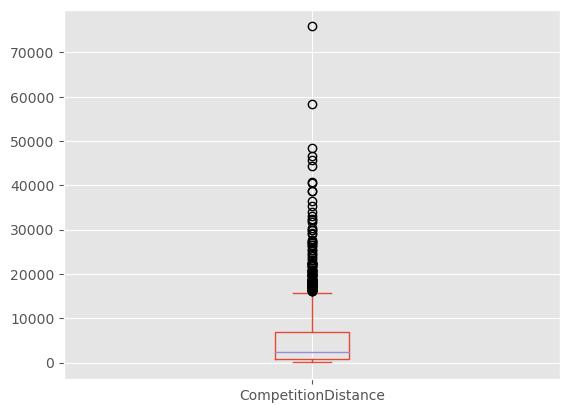

In [22]:
#let see the outliers, so we can choose between mean and median to fill the NaNs
store_df.CompetitionDistance.plot.box() 
print("the median is", store_df.CompetitionDistance.median(), "and mean is", store_df.CompetitionDistance.mean())

In [23]:
print("Since we have here some outlier, its better to input the median value to those few missing values.")
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace = True)

Since we have here some outlier, its better to input the median value to those few missing values.


In [24]:
#The missing values, are not there, because the stores had no competition. So we would suggest to fill the missing values with zeros.
store_df["CompetitionOpenSinceMonth"].fillna(0, inplace = True)
store_df["CompetitionOpenSinceYear"].fillna(0, inplace = True)

In [25]:
store_df.groupby(by = "Promo2", axis = 0).count() 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Promo2,,,,,,,,,
0,544,544,544,544,544,544,0,0,0
1,571,571,571,571,571,571,571,571,571


In [26]:
store_df["Promo2SinceWeek"].fillna(0, inplace = True)
store_df["Promo2SinceYear"].fillna(0, inplace = True)
store_df["PromoInterval"].fillna(0, inplace = True)

store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Now lets merge the files: stores and training, so we can go on with our analysis.

In [27]:
train_store_df = pd.merge(train_df, store_df, how = "left", on = "Store")
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Open                       844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   SchoolHoliday              844392 non-null  int64  
 8   StateHoliday_cat           844392 non-null  int64  
 9   StoreType                  844392 non-null  object 
 10  Assortment                 844392 non-null  object 
 11  CompetitionDistance        844392 non-null  float64
 12  CompetitionOpenSinceMonth  844392 non-null  float64
 13  CompetitionOpenSinceYear   84

In [28]:
train_store_df["Avg_Customer_Sales"] = train_store_df.Sales / train_store_df.Customers

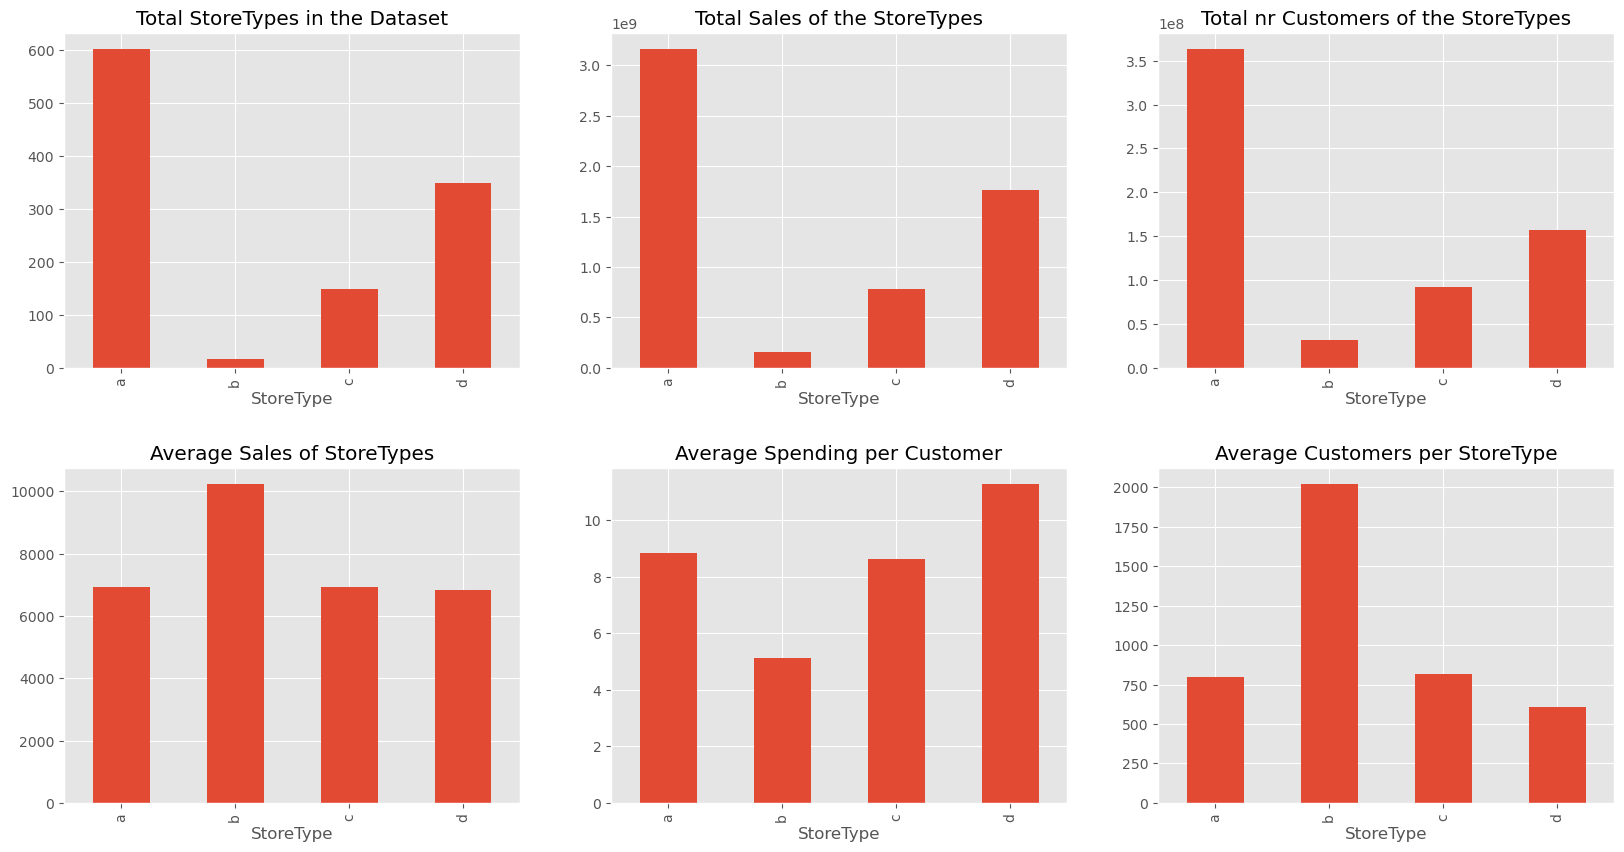

In [29]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
train_store_df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
train_store_df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
train_store_df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
train_store_df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
train_store_df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

So only the StoreType B has all assortments. I think thats why they are performing so good. Maybe this StoreType has more sales area.
      The assortment C is a good one, because the StoreType D has the best average customer spending.


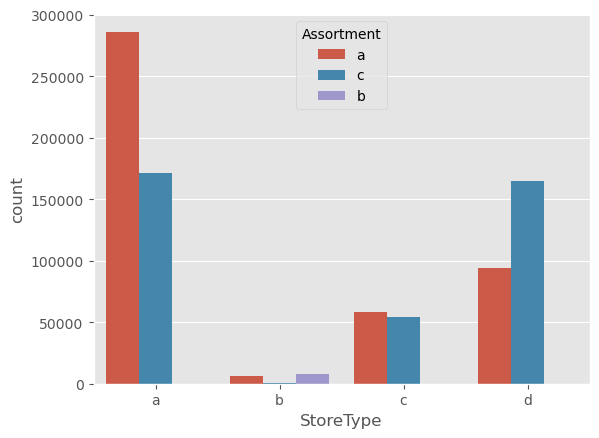

In [30]:
sns.countplot(data = train_store_df, x = "StoreType", hue = "Assortment", order=["a","b","c","d"]) 
print("""So only the StoreType B has all assortments. I think thats why they are performing so good. Maybe this StoreType has more sales area.
      The assortment C is a good one, because the StoreType D has the best average customer spending.""")

plt.show()

In [31]:
train_store_df.Date = train_store_df.Date.astype("datetime64[ns]")

train_store_df["Month"] = train_store_df.Date.dt.month
train_store_df["Year"] = train_store_df.Date.dt.year
train_store_df["Day"] = train_store_df.Date.dt.day

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


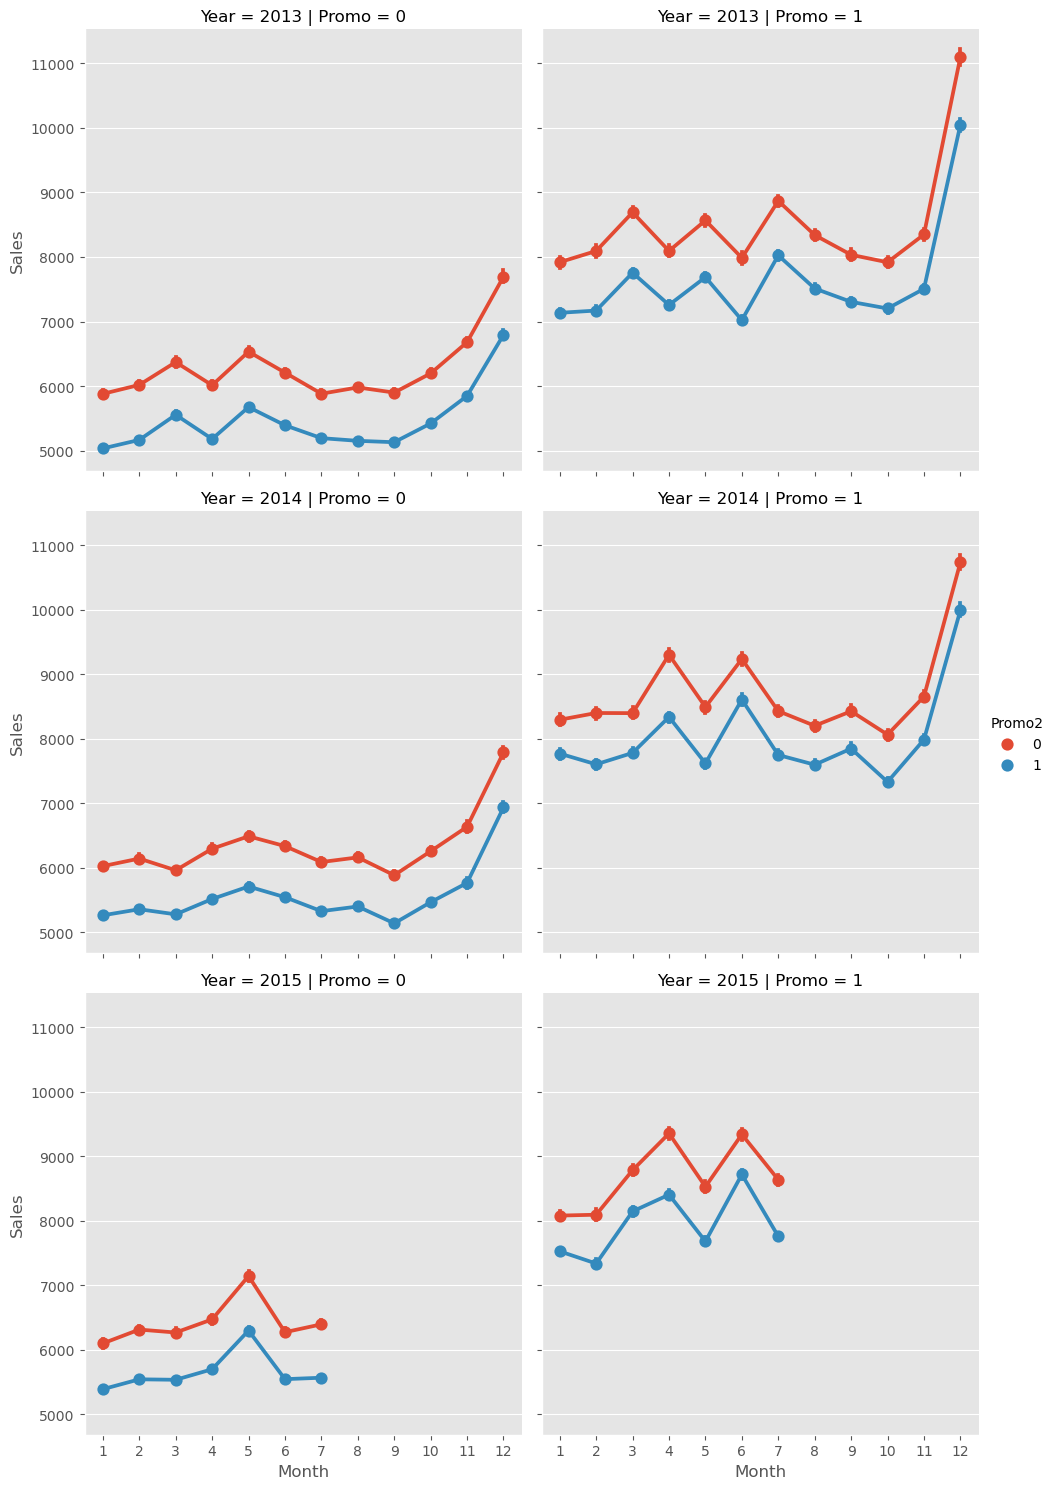

In [32]:
sns.factorplot(data = train_store_df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


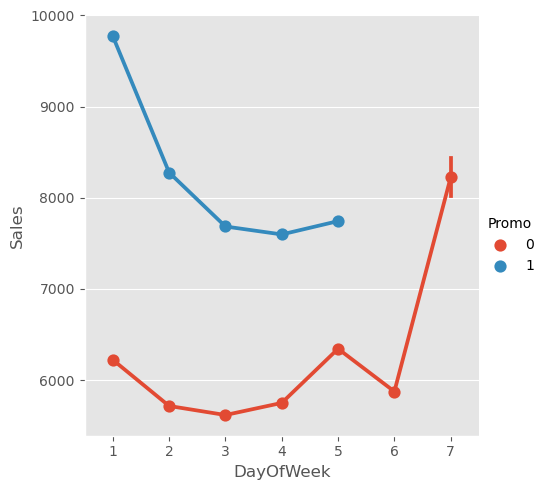

In [33]:
sns.factorplot(data = train_store_df, x = "DayOfWeek", y = "Sales", hue = "Promo")


In [34]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.""")
print("There are", train_store_df[(train_store_df.Open == 1) & (train_store_df.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")    


So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.
There are 33 stores opend on sundays


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


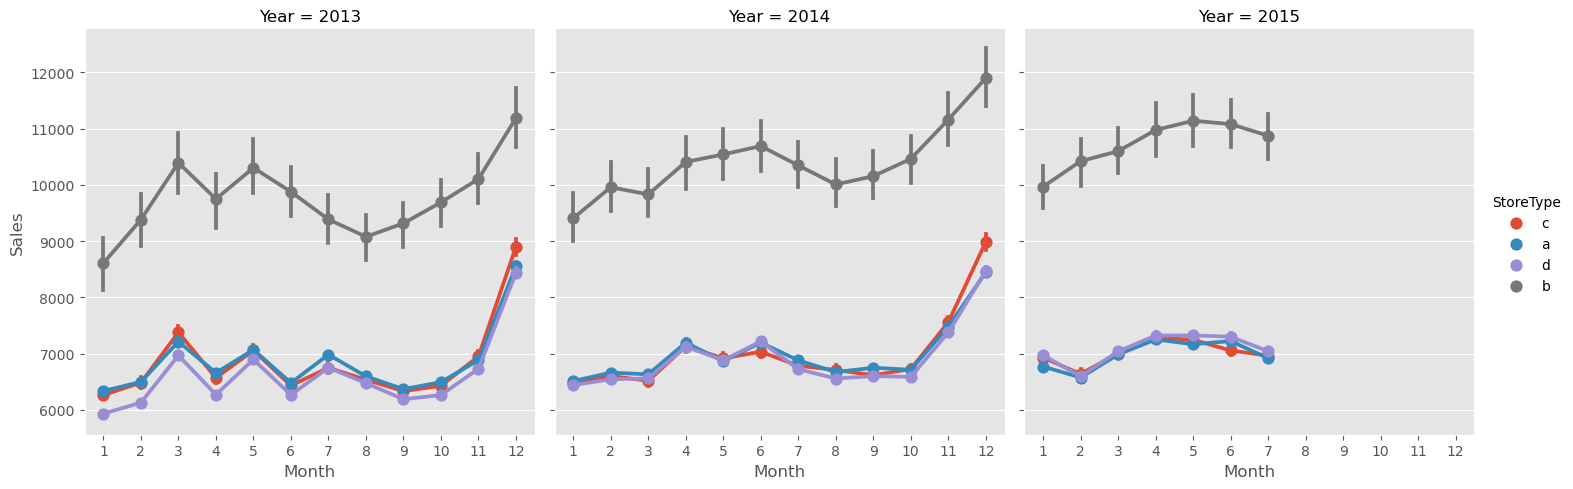

In [35]:
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly. 
sns.factorplot(data = train_store_df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")

In [36]:
train_store_df.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
train_store_df["CompetitionDistance_Cat"] = pd.cut(train_store_df["CompetitionDistance"], 5)

<AxesSubplot:title={'center':'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

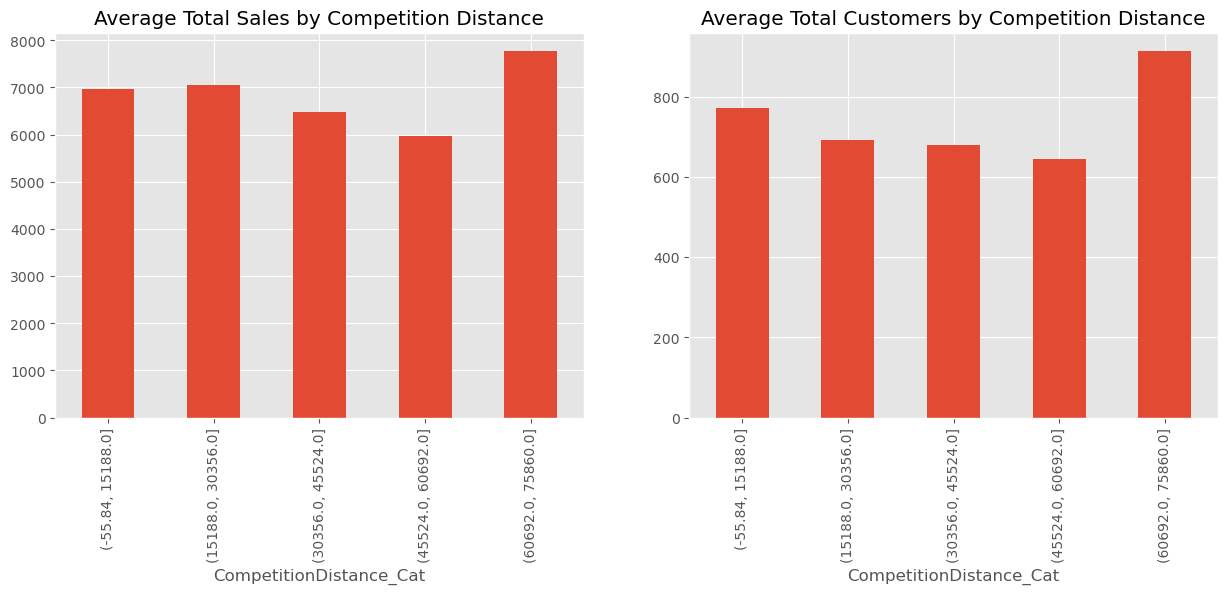

In [37]:
f, ax = plt.subplots(1,2, figsize = (15,5))

train_store_df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
train_store_df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [38]:
# train_store_df["Promo"] = train_store_df["Promo"].astype("category") # it's already numerica
# train_store_df["SchoolHoliday"] = train_store_df["SchoolHoliday"].astype("category") # it's already numerica
train_store_df["StoreType"] = train_store_df["StoreType"].astype("category")
train_store_df["Assortment"] = train_store_df["Assortment"].astype("category")
# train_store_df["Promo2"] = train_store_df["Promo2"].astype("category") # it's already numerica
train_store_df["PromoInterval"] = train_store_df["PromoInterval"].astype("category")

train_store_df["StoreType_cat"] = train_store_df["StoreType"].cat.codes
train_store_df["Assortment_cat"] = train_store_df["Assortment"].cat.codes
train_store_df["PromoInterval_cat"] = train_store_df["Assortment"].cat.codes

train_store_df["StateHoliday_cat"] = train_store_df["StateHoliday_cat"].astype("float")
train_store_df["StoreType_cat"] = train_store_df["StoreType_cat"].astype("float")
train_store_df["Assortment_cat"] = train_store_df["Assortment_cat"].astype("float")
train_store_df["PromoInterval_cat"] = train_store_df["PromoInterval_cat"].astype("float")

In [39]:
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   SchoolHoliday              844392 non-null  int64         
 8   StateHoliday_cat           844392 non-null  float64       
 9   StoreType                  844392 non-null  category      
 10  Assortment                 844392 non-null  category      
 11  CompetitionDistance        844392 non-null  float64 

<AxesSubplot:>

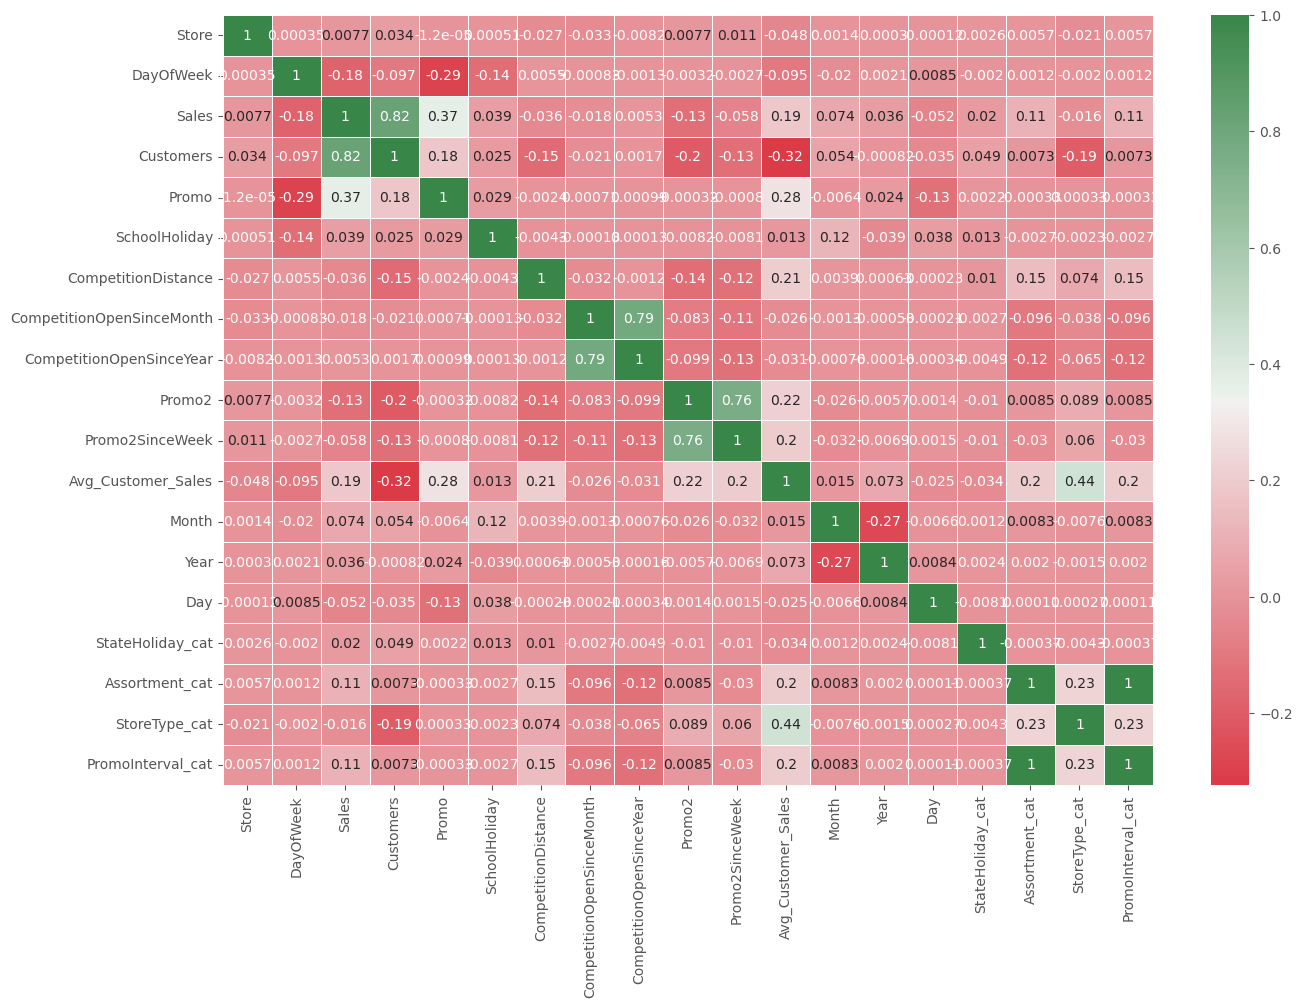

In [40]:
df_correlation = train_store_df[["Store", "DayOfWeek", "Sales", "Customers", "Promo", "SchoolHoliday", "CompetitionDistance", 
                                 "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2", "Promo2SinceWeek", "Avg_Customer_Sales", 
                                 "Month", "Year", "Day", "StateHoliday_cat", "Assortment_cat", "StoreType_cat", "PromoInterval_cat"]]


f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)


# Conclusion of the analysis:
StoreType A has the most sells and customers.
StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.
StoreTybe D had the highest buyer cart.
Promo runs only in weekdays.
Promo2 doesnt seems to be correlated to any significant change in the sales amount.
Customers tends to buy more on Monday, when there's promotion running (Promo) and on Sundays, when there is no promotion at all. 
Sales and customer have a very strong co-relation with a factor of 0.82. StoreType and Average Customer Sales also have strong correlation at 0.44, which explain the exception sales of store type b compare to others. For other variables, it is insignificant.
At this point, no distinct yearly trends have been observed. Only seasonal patterns. 


# ARIMA Forecasting

<AxesSubplot:xlabel='Date'>

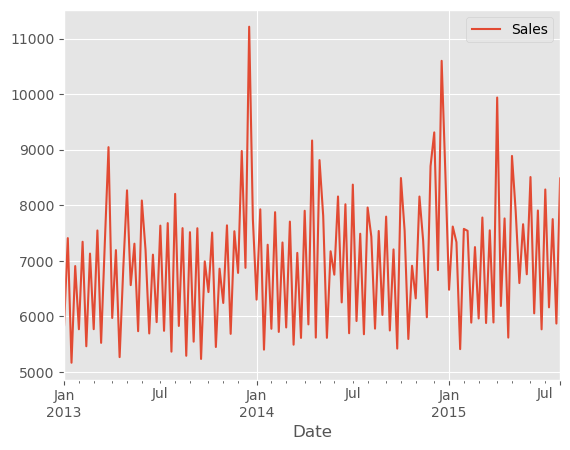

In [41]:
ts_arima = train_store_df.set_index("Date").resample("W").mean() #set the index to date and resample it by summing to monthly values
ts_arima = ts_arima[["Sales"]]
ts_arima.plot()

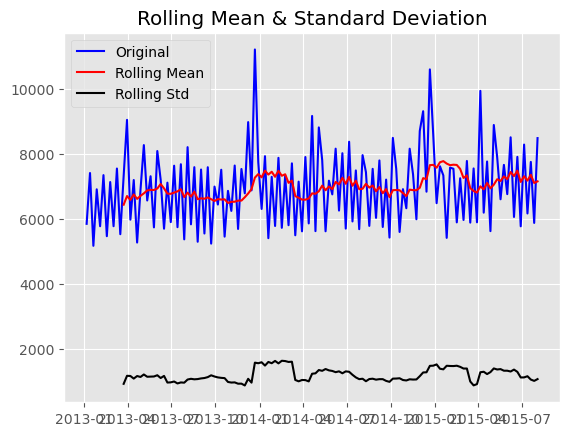

In [42]:
# Let's see if we have stationary or non-stationary time series

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

test_stationarity(ts_arima)

In [43]:
import warnings
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

# Let's begin by generating the various combination of parameters that we wish to assess:

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [44]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2758.376473500445
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2442.2712635578546
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2182.959421090318
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1929.3167714924264
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2203.743698132475
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2162.63540536636
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1954.4352162224814
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1930.2161165052908
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2668.7566203378083
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2344.26066946825
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2157.1372845651736
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1901.4242538046126
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2198.5555382433395
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2139.1230506148404
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1942.837768235383
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1901.3130221467004
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2399.53422109695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2180.337477867119
ARI

In [45]:
# this is the optimal paramater for our model: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1847.5087433770632

mod = sm.tsa.statespace.SARIMAX(ts_arima,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5577      0.090     -6.229      0.000      -0.733      -0.382
ma.L1         -0.7300      0.060    -12.221      0.000      -0.847      -0.613
ar.S.L12      -0.1579      0.133     -1.186      0.236      -0.419       0.103
ma.S.L12      -1.0328      0.663     -1.559      0.119      -2.331       0.266
sigma2      1.199e+06   8.76e+05      1.370      0.171   -5.17e+05    2.92e+06


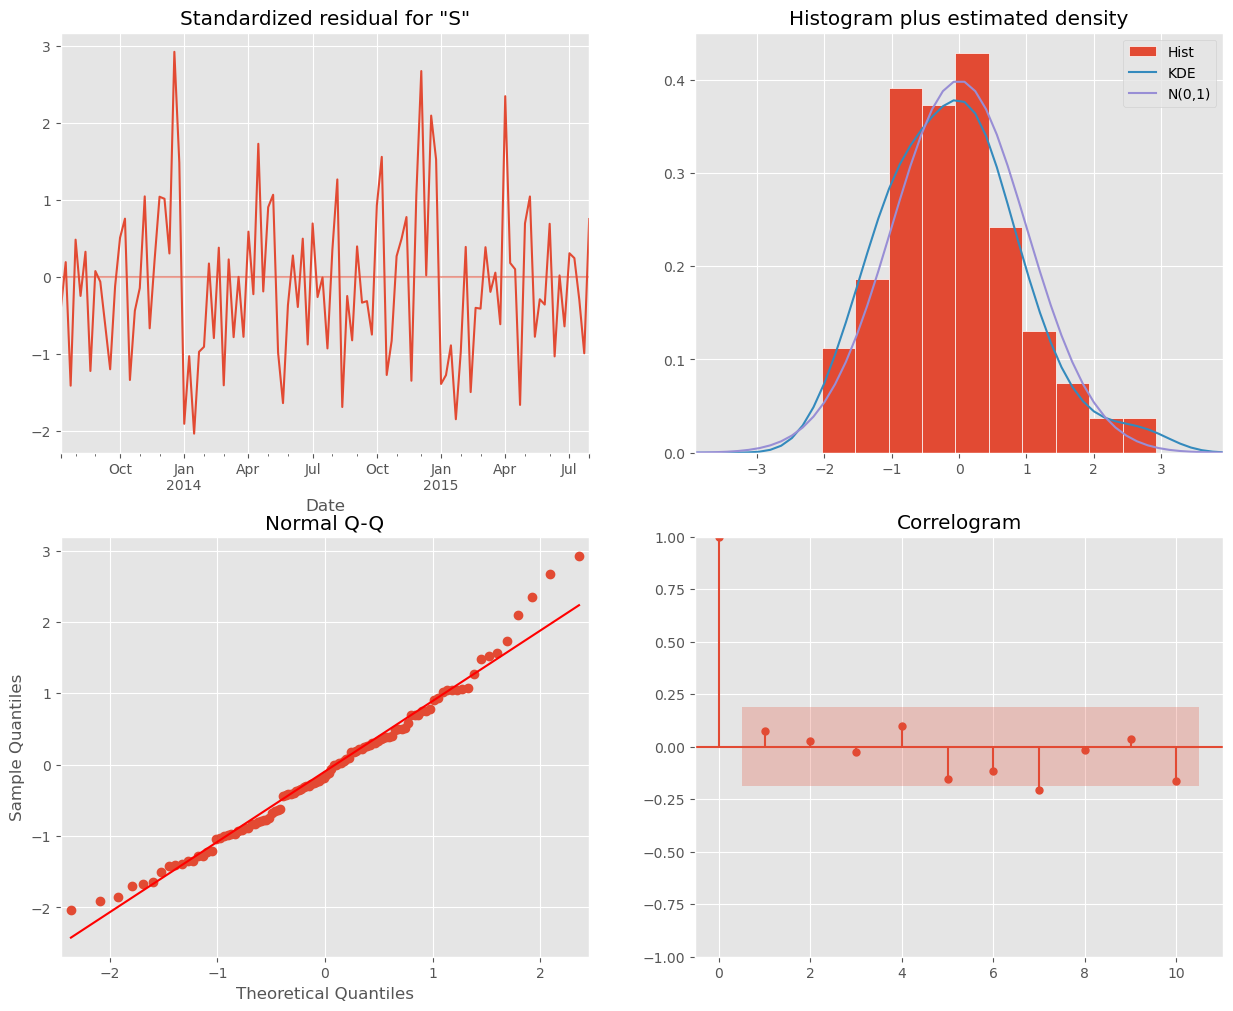

In [46]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

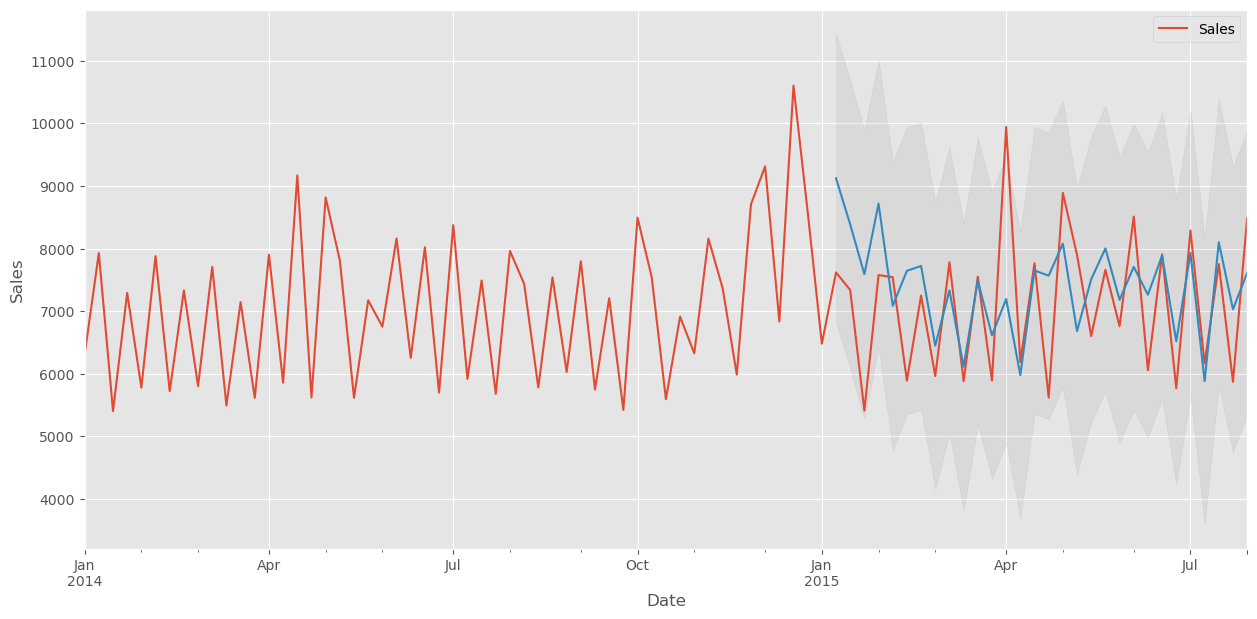

RMS: 1060.2381220085788


In [47]:
# Lets go ahead with validating forecasts

pred = results.get_prediction(start = pd.to_datetime("2015-01-11"), dynamic = False) 
# lets start the fc to start from 1.11.2015. 
# The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.
pred_ci = pred.conf_int() # Get confidence intervals of forecasts

ax = ts_arima["2014":].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead FC", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend
plt.show()

# -----------
#  extract the predicated and true values of our time series
ts_forecasted = pred.predicted_mean
ts_truth = ts_arima["2015-01-11":]
# calculate the Root mean square for final comparation
rms_arima = sqrt(mean_squared_error(ts_truth, ts_forecasted))
print("RMS:", rms_arima) 

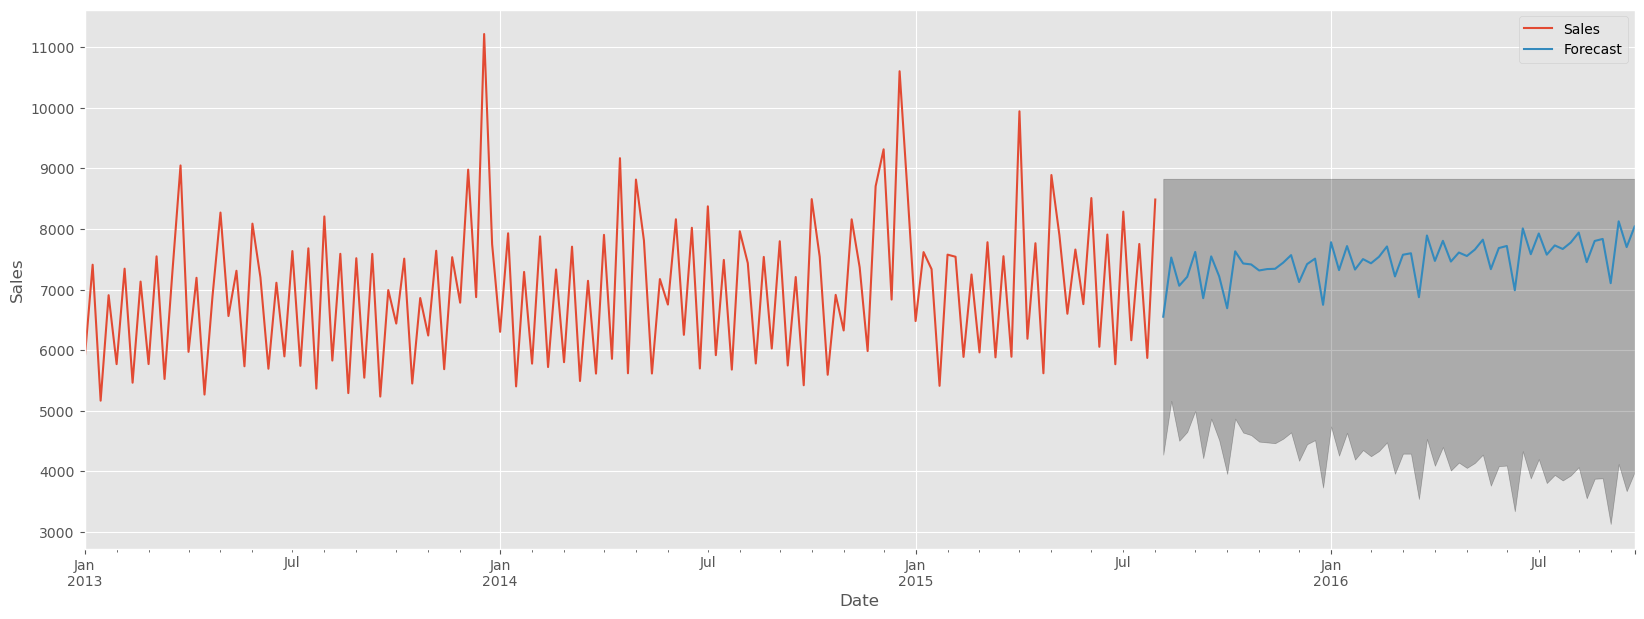

In [48]:
pred_uc = results.get_forecast(steps = 60) # lets get a forecast for the next few periods
pred_ci = pred_uc.conf_int() # Get confidence intervals of forecasts

ax = ts_arima.plot(label = "observed", figsize = (20,7))
pred_uc.predicted_mean.plot(ax = ax, label = "Forecast")
ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:, 0],
               pred_ci.iloc[0, 1], color = "k", alpha = 0.25)
ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend()
plt.show()

# Random Forest Regression
Before we can start with fit and train our model, we need to do some feature engineering.

The CompetitionOpenSinceMonth/Year variables have the same meaning. So lets convert them into one variable that we call CompetitionOpenSince. It makes it easier for the algorithm to understand the pattern and creates less branches and thus complex trees.

In [49]:
train_store_df["CompetitionOpenSince"] = np.where((train_store_df["CompetitionOpenSinceMonth"] == 0) & (train_store_df["CompetitionOpenSinceYear"] == 0), 
                                                0,(train_store_df.Month - train_store_df.CompetitionOpenSinceMonth) + (12 *(train_store_df.Year - train_store_df.CompetitionOpenSinceYear)))

# lets drop the variables
train_store_df = train_store_df.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"], axis = 1)

In [50]:
# lets drop few variables, that either or not numeric or we dont need them anymore
# lets create a new data frame for this model
ts_rfr = train_store_df.copy()
ts_rfr = train_store_df.drop(["Date","StoreType", "Assortment", "PromoInterval", "CompetitionDistance_Cat"], axis = 1) #dop this columns, as we already have them in categories


In [51]:
from sklearn import model_selection
from sklearn import metrics

features = ts_rfr.drop(["Customers", "Sales", "Avg_Customer_Sales"], axis = 1)
target = ts_rfr["Sales"]

X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, target, test_size = 0.20, random_state = 15) 
# We call here train_test_set which is  divided 80% and 20% validation
print(X_train.shape, X_train_test.shape, y_train.shape, y_train_test.shape)

(675513, 17) (168879, 17) (675513,) (168879,)


In [52]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
yhat = rfr.predict(X_train_test)
rms_rfr = sqrt(mean_squared_error(y_train_test, yhat))
print("RMS:", rms_rfr) 

RMS: 983.0790972500499


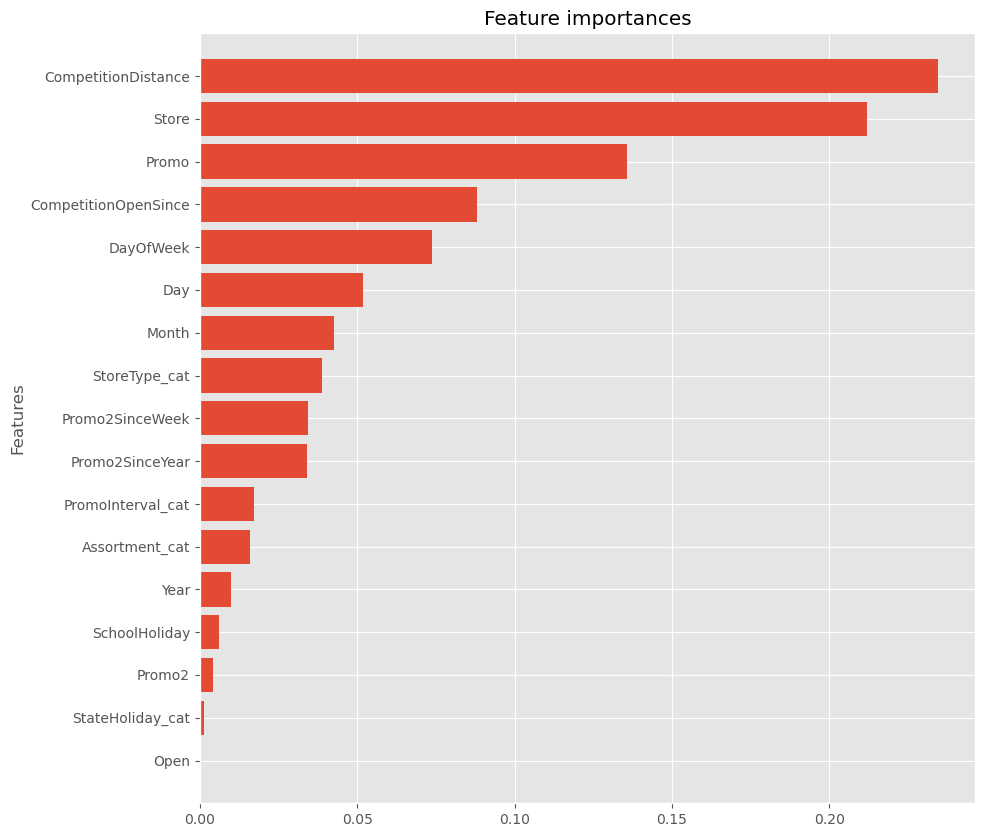

In [53]:
importances = rfr.feature_importances_
std = np.std([rfr.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)
palette1 = itertools.cycle(sns.color_palette())
# Store the feature ranking
features_ranked=[]
for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])
# Plot the feature importances of the forest

plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
            color=[next(palette1)], align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train.shape[1]])
plt.show()

# XGBoost

In [54]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [55]:
import sys
!{sys.executable} -m pip install xgboost

In [56]:
import xgboost as xgb

param = {'max_depth':10, # maximum depth of a tree
         "booster": "gbtree",   # use tree based models 
         'eta':1, # learning rate
         'silent':1, # silent mode
         'objective':'reg:linear', # for linear regression
        }

num_round = 100 #how many boosting rounds

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_train_test, y_train_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

xgboost = xgb.train(param, dtrain, num_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)
         
# make prediction
preds = xgboost.predict(dtest)

[02:10:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[02:10:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:2274.78939	train-rmspe:nan	eval-rmse:2280.62660	eval-rmspe:nan
[1]	train-rmse:2150.56168	train-rmspe:nan	eval-rmse:2172.11678	eval-rmspe:nan
[2]	train-rmse:1908.50086	train-rmspe:nan	eval-rmse:1936.47233	eval-rmspe:nan
[3]	train-rmse:1790.50876	train-rmspe:nan	eval-rmse:1818.58774	eval-rmspe:nan
[4]	train-rmse:1684.41688	train-rmspe:nan	eval-rmse:1714.69842	eval-rmspe:nan
[5]	train-rmse:1444.01889	train-rmspe:nan	eval-rmse:1478.74780	eval-rmspe:nan
[6]	train-rmse:1334.70978	train-rmspe:nan	eval-rmse:1370.92132	eval-rmspe:nan
[7]	train-rmse:1269.44910	t

In [57]:
rms_xgboost = sqrt(mean_squared_error(y_train_test, preds))
print("RMS:", rms_xgboost) 

RMS: 841.9207317999857


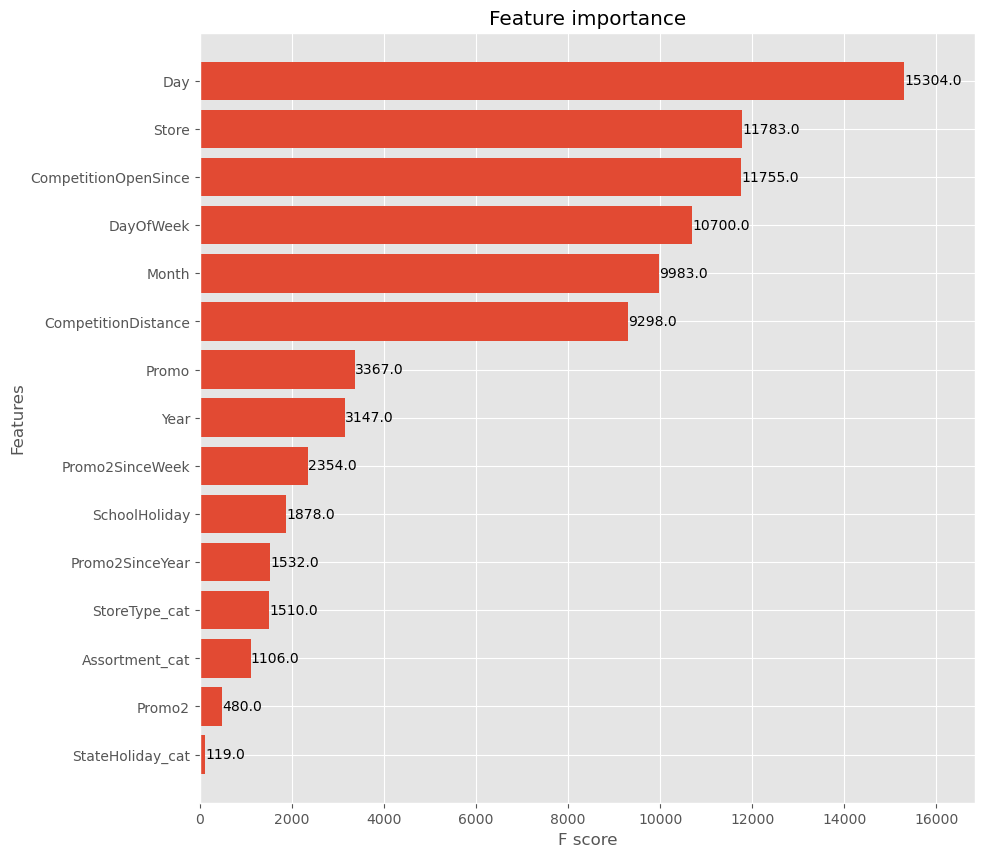

In [58]:
# Lets see the feature importance
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgboost, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [59]:
print("now lets see the scores togher")

model_errors = pd.DataFrame({
    "Model": ["SARIMAX", "Random Forest Regression", "XGBoost"],
    "Score": [rms_arima, rms_rfr, rms_xgboost]
})

model_errors.sort_values(by = "Score", ascending = True)

now lets see the scores togher


,Model,Score
2,XGBoost,841.920732
1,Random Forest Regression,983.079097
0,SARIMAX,1060.238122
